#### Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\Assignment 5\Telco_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

### EDA (Exploratory Data Analysis)

* The dataset is comprised of 21 columns and 7043 records.
* The target variable appears to be `Churn` which is the last column. This dataset will require a supervised classfication ML model to predict weather a customer is going to Churn or remain with Telco.
* I will need to do some further investigation to substantiate this claim but a majority of the columns appear to be **Categorical** that are currently in text format. This means that a majority of the features will need to be encoded to train the model.

In [5]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* It appears that a majority of the columns are indeed categorical. I will be plotting the distibution in pie plots to view how balanced the dataset is. 
* The `TotalCharges` column will need to be converted to a float as it is currently in text.

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.drop(['customerID'], axis = 1, inplace = True) # column is of no use 
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


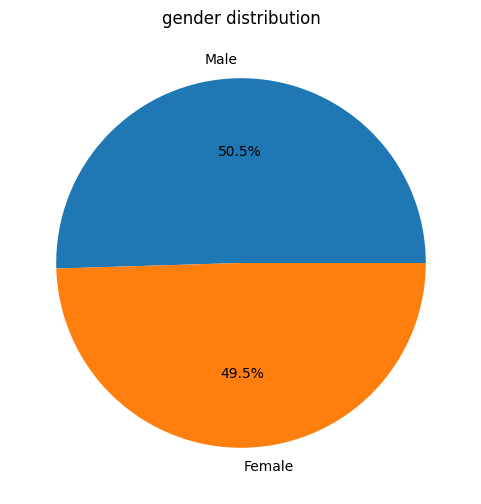

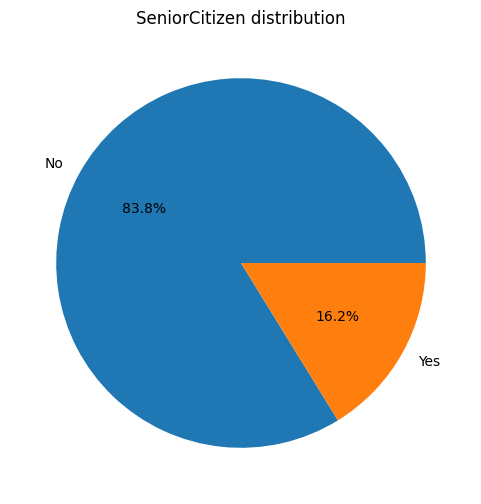

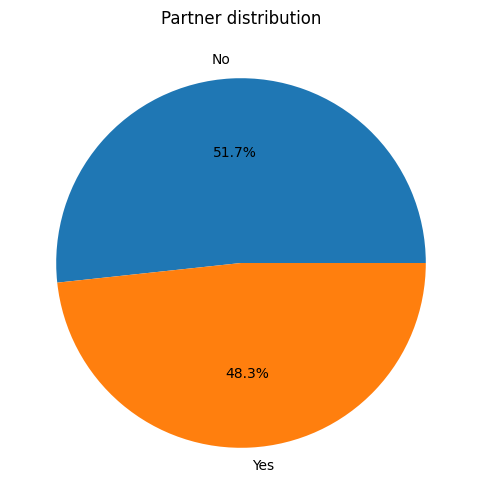

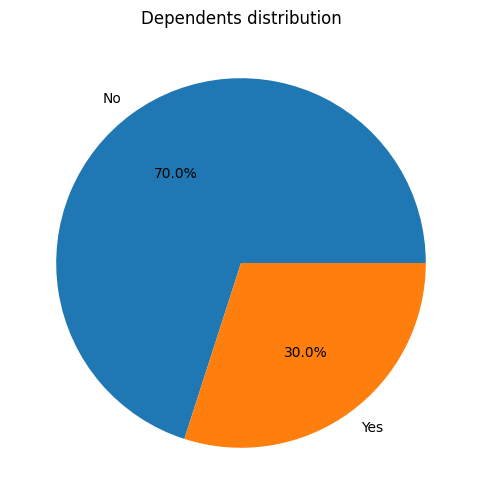

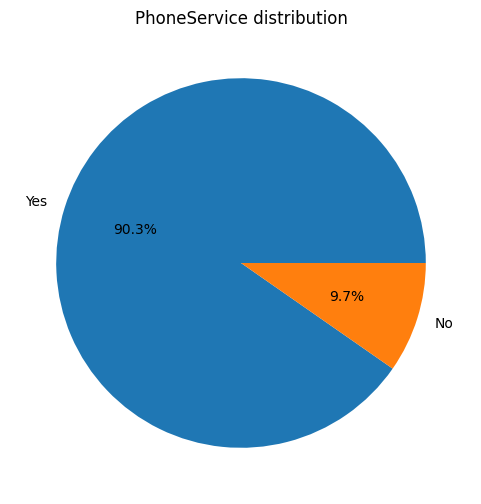

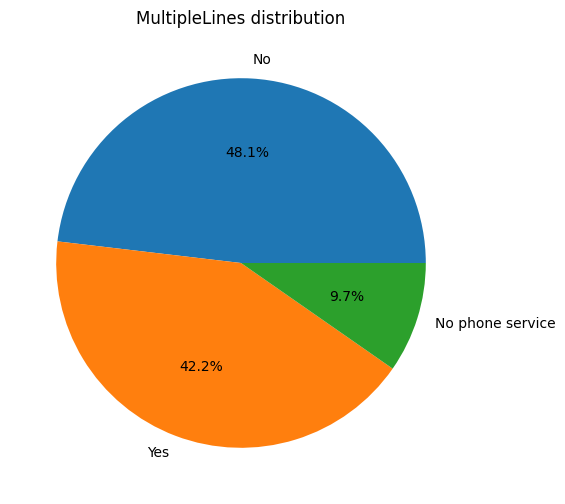

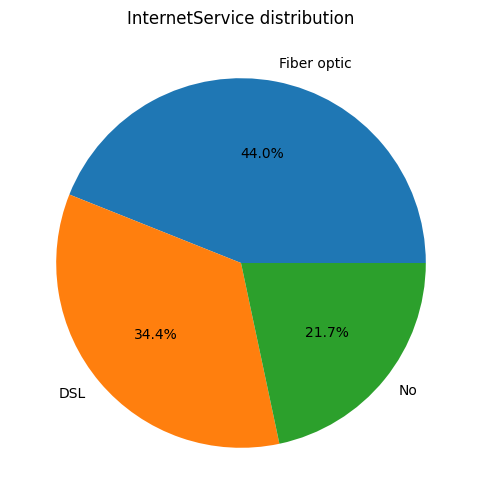

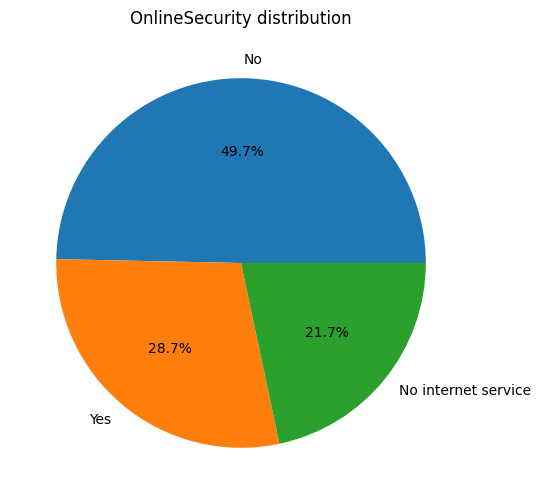

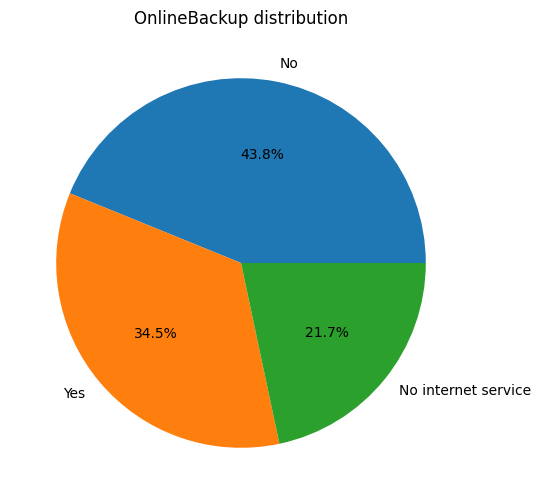

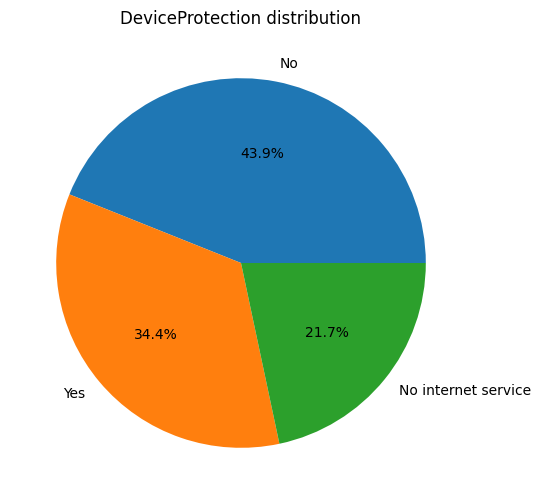

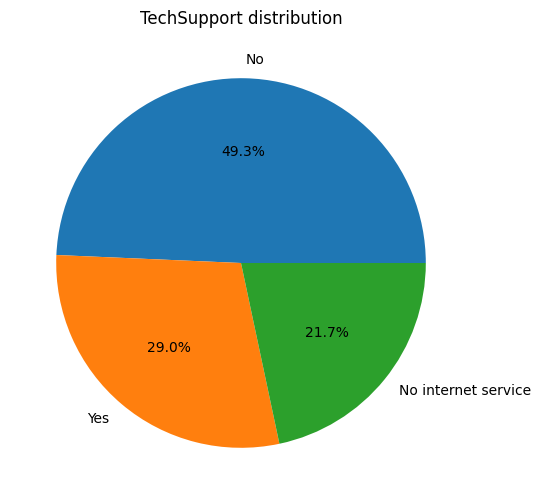

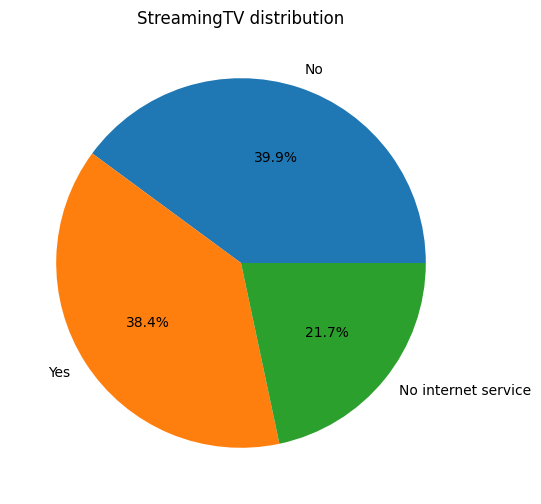

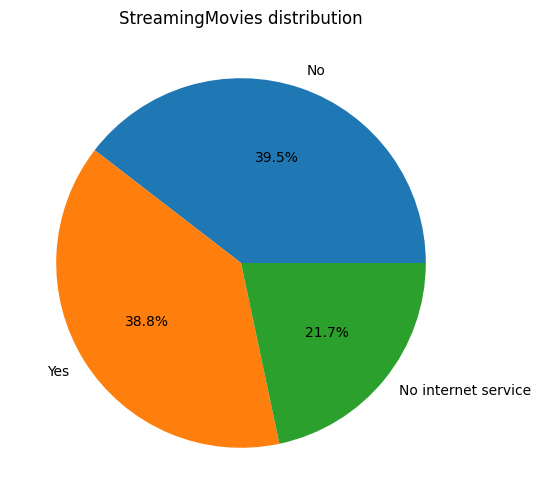

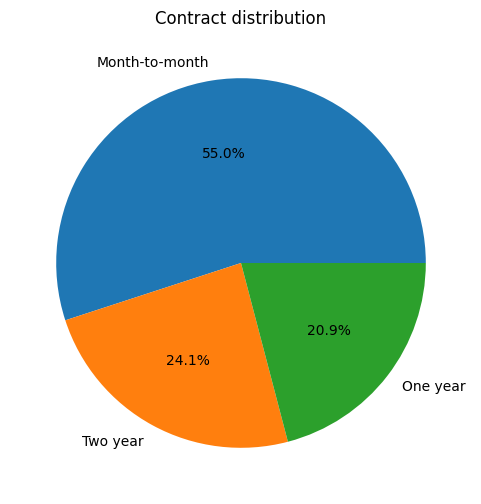

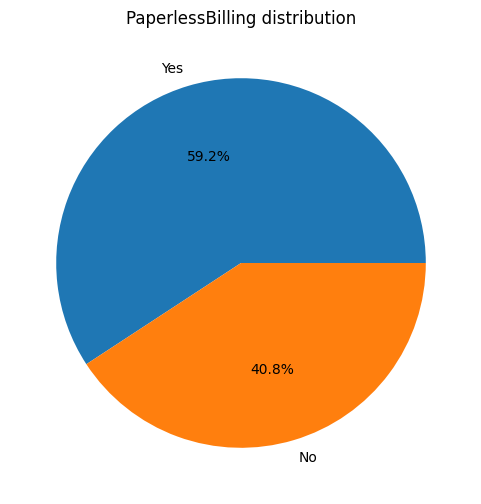

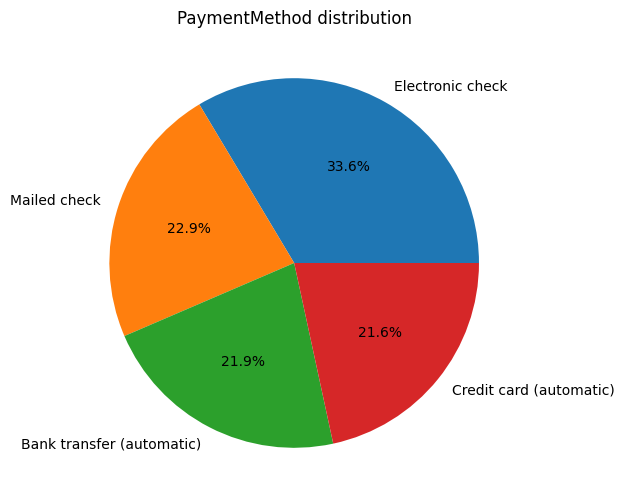

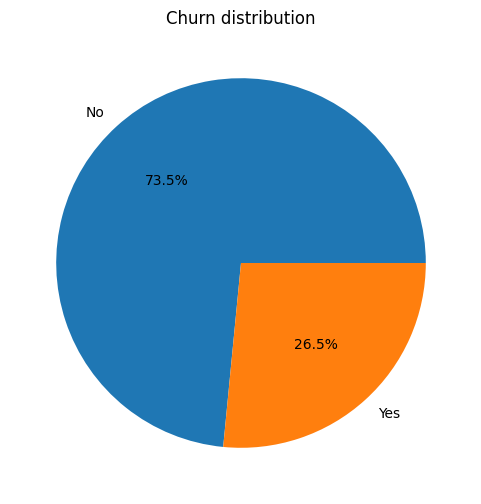

In [7]:
columns = [col for col in df.columns if df[col].dtype == 'object']
for col in columns: 
    vc = df[col].value_counts()
    plt.figure(figsize=(6, 6))
    vc.plot(kind='pie', autopct="%1.1f%%", title =f"{col} distribution")
    plt.ylabel('')
    plt.show()

In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)
df.isnull().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_33356\165474582.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [11]:

#Defining target(Dependent) and features(Independent)
X_raw = df.drop('Churn', axis = 1)
X_raw['gender'] = X_raw['gender'].map({'Female': 0, 'Male': 1})
y_raw = df['Churn']

binary_cols = ['SeniorCitizen', 'Partner', 'Dependents','PhoneService',  'PaperlessBilling']
    #Encoding binary columns 
for col in binary_cols:
    X_raw[col] = X_raw[col].map({'Yes': 1, 'No': 0})
    

X_raw.isnull().sum().sum()


np.int64(0)

#### Training Models on Train Dataset

Random state: 0, Accuracy: 0.7686302342086586, Precision: 0.5660377358490566
---------------------------
The mean accuracy is: 0.7686302342086586
The mean precision is: 0.5660377358490566
Random state: 1, Accuracy: 0.7927608232789212, Precision: 0.5843373493975904
---------------------------
The mean accuracy is: 0.7806955287437899
The mean precision is: 0.5751875426233235
Random state: 2, Accuracy: 0.7963094393186657, Precision: 0.6013289036544851
---------------------------
The mean accuracy is: 0.7859001656020818
The mean precision is: 0.5839013296337107
Random state: 3, Accuracy: 0.7920511000709723, Precision: 0.6190476190476191
---------------------------
The mean accuracy is: 0.7874378992193044
The mean precision is: 0.5926879019871878
Random state: 4, Accuracy: 0.7757274662881476, Precision: 0.5833333333333334
---------------------------
The mean accuracy is: 0.785095812633073
The mean precision is: 0.5908169882564169
Random state: 5, Accuracy: 0.7934705464868701, Precision: 0.6

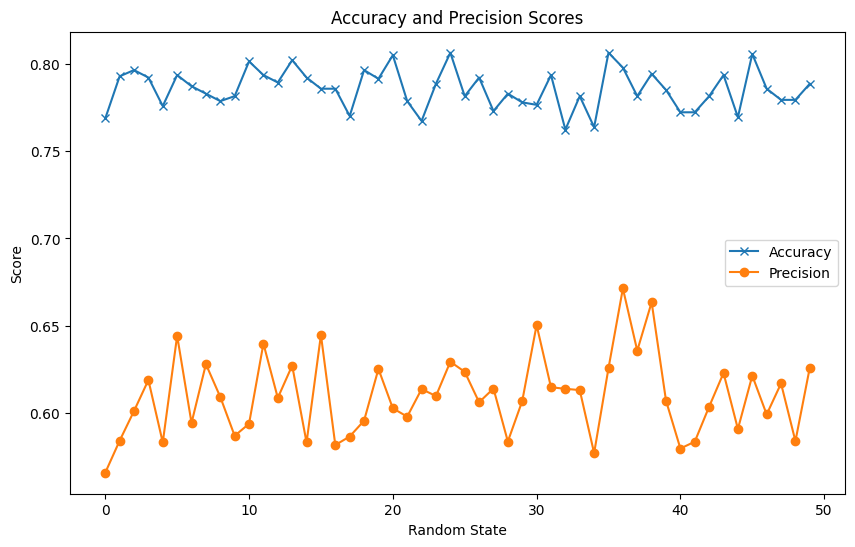

In [12]:
from sklearn.metrics import accuracy_score,precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaymentMethod']



n = 50 
random_state = []
forest_accuracy = []
forest_precision = []


for i in range(n): 
    random_state.append(i)
    #splitting test and training data 
    #Splitting the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = i)
  

    #One hot encode X_train and X_test categorical columns 
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays into DataFrames with matching indices
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Drop original categorical columns and merge encoded columns
    X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

    
    #Data Resampling as the original data set is imbalanced 
    smote = SMOTE(random_state = i)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    #Scaling data
    scaler = StandardScaler()
    X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    #Model fitting
    rfc = RandomForestClassifier(random_state = i)
    rfc.fit(X_train_resampled, y_train_resampled)
    y_pred = rfc.predict(X_test)
    forest_accuracy.append(accuracy_score(y_test, y_pred))
    forest_precision.append(precision_score(y_test, y_pred))
    print(f"Random state: {i}, Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred)}")
    print("-" * 27)
    print(f"The mean accuracy is: {np.mean(forest_accuracy)}")
    print(f"The mean precision is: {np.mean(forest_precision)}")


    #Plotting the accuracy and precision scores

plt.figure(figsize=(10, 6))
plt.plot(random_state, forest_accuracy, label = 'Accuracy', marker = 'x')
plt.plot(random_state, forest_precision, label = 'Precision', marker = 'o')
plt.xlabel('Random State')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores')
plt.legend()
plt.show()

    



Random state: 0, Accuracy: 0.7686302342086586, Precision: 0.5617647058823529
---------------------------
The mean accuracy is: 0.7686302342086586
The mean precision is: 0.5617647058823529
Random state: 1, Accuracy: 0.7955997161107168, Precision: 0.581081081081081
---------------------------
The mean accuracy is: 0.7821149751596876
The mean precision is: 0.5714228934817169
Random state: 2, Accuracy: 0.7906316536550745, Precision: 0.5830721003134797
---------------------------
The mean accuracy is: 0.7849538679914833
The mean precision is: 0.5753059624256379
Random state: 3, Accuracy: 0.7885024840312278, Precision: 0.6058631921824105
---------------------------
The mean accuracy is: 0.7858410220014194
The mean precision is: 0.582945269864831
Random state: 4, Accuracy: 0.7679205110007097, Precision: 0.5673352435530086
---------------------------
The mean accuracy is: 0.7822569198012774
The mean precision is: 0.5798232646024666
Random state: 5, Accuracy: 0.7735982966643009, Precision: 0.59

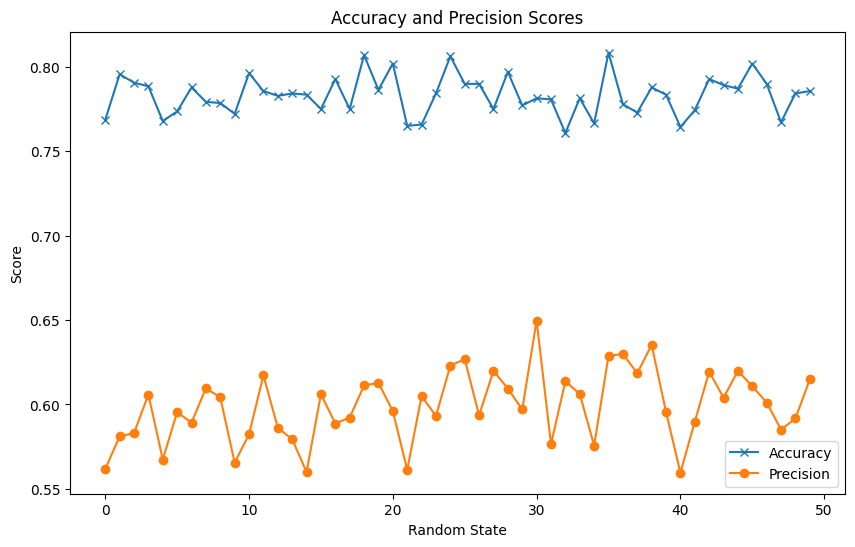

In [13]:
from xgboost import XGBClassifier
n = 50 
random_state = []
xg_accuracy = []
xg_precision = []


for i in range(n): 
    random_state.append(i)
    #splitting test and training data 
    #Splitting the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = i)
  

    #One hot encode X_train and X_test categorical columns 
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays into DataFrames with matching indices
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Drop original categorical columns and merge encoded columns
    X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

    
    #Data Resampling as the original data set is imbalanced 
    smote = SMOTE(random_state = i)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    #Scaling data
    scaler = StandardScaler()
    X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    #Model fitting
    xgb = XGBClassifier(random_state = i)
    xgb.fit(X_train_resampled, y_train_resampled)
    y_pred = xgb.predict(X_test)
    xg_accuracy.append(accuracy_score(y_test, y_pred))
    xg_precision.append(precision_score(y_test, y_pred))
    print(f"Random state: {i}, Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred)}")
    print("-" * 27)
    print(f"The mean accuracy is: {np.mean(xg_accuracy)}")
    print(f"The mean precision is: {np.mean(xg_precision)}")


    #Plotting the accuracy and precision scores

plt.figure(figsize=(10, 6))
plt.plot(random_state, xg_accuracy, label = 'Accuracy', marker = 'x')
plt.plot(random_state, xg_precision, label = 'Precision', marker = 'o')
plt.xlabel('Random State')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores')
plt.legend()
plt.show()


Random state: 0, Accuracy: 0.7501774308019872, Precision: 0.5173913043478261
---------------------------
The mean accuracy is: 0.7501774308019872
The mean precision is: 0.5173913043478261
Random state: 1, Accuracy: 0.7757274662881476, Precision: 0.5340425531914894
---------------------------
The mean accuracy is: 0.7629524485450674
The mean precision is: 0.5257169287696577
Random state: 2, Accuracy: 0.7785663591199432, Precision: 0.5412844036697247
---------------------------
The mean accuracy is: 0.7681570854033594
The mean precision is: 0.5309060870696801
Random state: 3, Accuracy: 0.7892122072391767, Precision: 0.5767441860465117
---------------------------
The mean accuracy is: 0.7734208658623136
The mean precision is: 0.542365611813888
Random state: 4, Accuracy: 0.7537260468417317, Precision: 0.5300668151447662
---------------------------
The mean accuracy is: 0.7694819020581972
The mean precision is: 0.5399058524800636
Random state: 5, Accuracy: 0.7806955287437899, Precision: 0.5

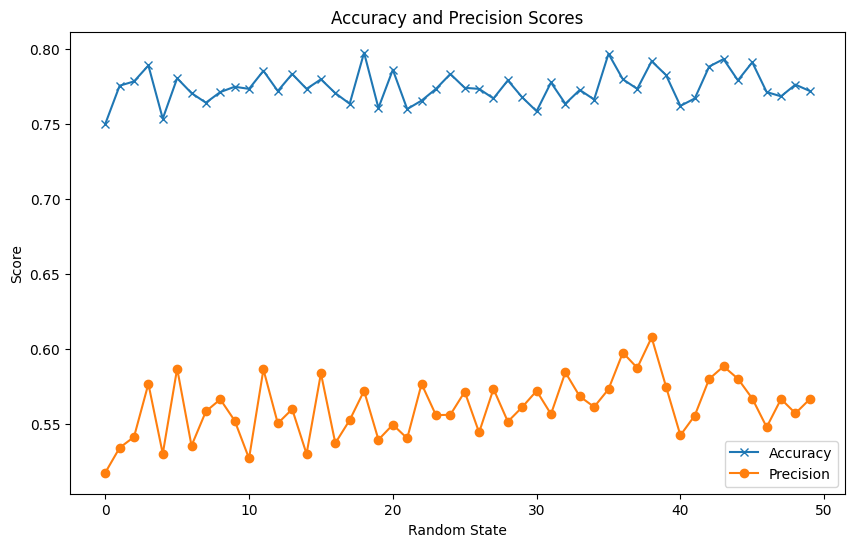

In [14]:
from sklearn.svm import SVC
n = 50 
random_state = []
xg_accuracy = []
xg_precision = []


for i in range(n): 
    random_state.append(i)
    #splitting test and training data 
    #Splitting the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = i)
  

    #One hot encode X_train and X_test categorical columns 
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays into DataFrames with matching indices
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Drop original categorical columns and merge encoded columns
    X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

    
    #Data Resampling as the original data set is imbalanced 
    smote = SMOTE(random_state = i)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    #Scaling data
    scaler = StandardScaler()
    X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    #Model fitting
    svc = SVC(random_state = i)
    svc.fit(X_train_resampled, y_train_resampled)
    y_pred = svc.predict(X_test)
    xg_accuracy.append(accuracy_score(y_test, y_pred))
    xg_precision.append(precision_score(y_test, y_pred))
    print(f"Random state: {i}, Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred)}")
    print("-" * 27)
    print(f"The mean accuracy is: {np.mean(xg_accuracy)}")
    print(f"The mean precision is: {np.mean(xg_precision)}")


    #Plotting the accuracy and precision scores

plt.figure(figsize=(10, 6))
plt.plot(random_state, xg_accuracy, label = 'Accuracy', marker = 'x')
plt.plot(random_state, xg_precision, label = 'Precision', marker = 'o')
plt.xlabel('Random State')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores')
plt.legend()
plt.show()


Random state: 0, Accuracy: 0.7565649396735273, Precision: 0.5287356321839081
---------------------------
The mean accuracy is: 0.7565649396735273
The mean precision is: 0.5287356321839081
Random state: 1, Accuracy: 0.7927608232789212, Precision: 0.5693069306930693
---------------------------
The mean accuracy is: 0.7746628814762242
The mean precision is: 0.5490212814384887
Random state: 2, Accuracy: 0.8005677785663591, Precision: 0.5819070904645477
---------------------------
The mean accuracy is: 0.7832978471729358
The mean precision is: 0.5599832177805083
Random state: 3, Accuracy: 0.8055358410220014, Precision: 0.6037296037296037
---------------------------
The mean accuracy is: 0.7888573456352022
The mean precision is: 0.5709198142677822
Random state: 4, Accuracy: 0.7629524485450674, Precision: 0.5467289719626168
---------------------------
The mean accuracy is: 0.7836763662171752
The mean precision is: 0.5660816458067491
Random state: 5, Accuracy: 0.7892122072391767, Precision: 0.

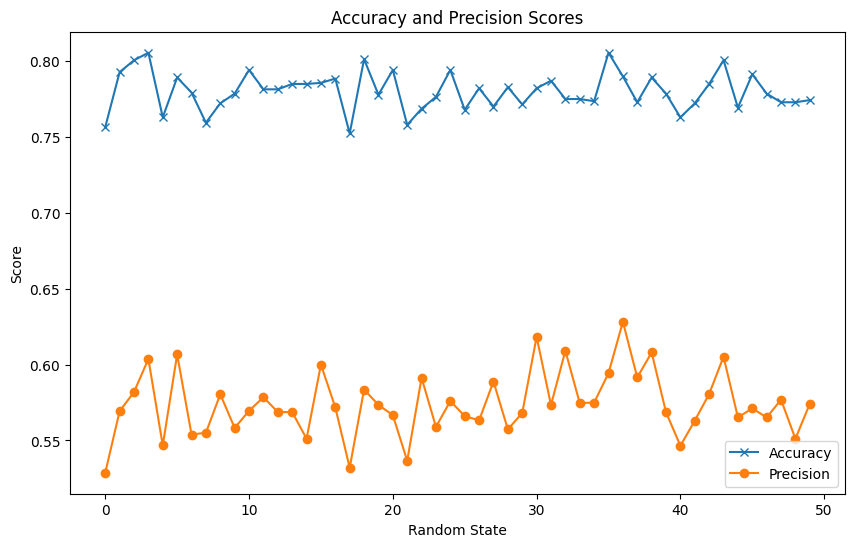

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

n = 50 
random_state = []
ada_accuracy = []
ada_precision = []
for i in range(n): 
    random_state.append(i)
    #splitting test and training data 
    #Splitting the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = i)
  

    #One hot encode X_train and X_test categorical columns 
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays into DataFrames with matching indices
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Drop original categorical columns and merge encoded columns
    X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

    
    #Data Resampling as the original data set is imbalanced 
    smote = SMOTE(random_state = i)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    #Scaling data
    scaler = StandardScaler()
    X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    #Model fitting
    ada = AdaBoostClassifier(random_state=i)
    ada.fit(X_train_resampled, y_train_resampled)
    y_pred = ada.predict(X_test)
    ada_accuracy.append(accuracy_score(y_test, y_pred))
    ada_precision.append(precision_score(y_test, y_pred))
    print(f"Random state: {i}, Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred)}")
    print("-" * 27)
    print(f"The mean accuracy is: {np.mean(ada_accuracy)}")
    print(f"The mean precision is: {np.mean(ada_precision)}")


    #Plotting the accuracy and precision scores

plt.figure(figsize=(10, 6))
plt.plot(random_state, ada_accuracy, label = 'Accuracy', marker = 'x')
plt.plot(random_state, ada_precision, label = 'Precision', marker = 'o')
plt.xlabel('Random State')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores')
plt.legend()
plt.show()


Random state: 0, Accuracy: 0.7061745919091554, Precision: 0.4444444444444444
---------------------------
The mean accuracy is: 0.7061745919091554
The mean precision is: 0.4444444444444444
Random state: 1, Accuracy: 0.730305180979418, Precision: 0.46153846153846156
---------------------------
The mean accuracy is: 0.7182398864442867
The mean precision is: 0.452991452991453
Random state: 2, Accuracy: 0.730305180979418, Precision: 0.45897435897435895
---------------------------
The mean accuracy is: 0.7222616512893305
The mean precision is: 0.454985754985755
Random state: 3, Accuracy: 0.7019162526614621, Precision: 0.431980906921241
---------------------------
The mean accuracy is: 0.7171753016323634
The mean precision is: 0.4492345429696265
Random state: 4, Accuracy: 0.730305180979418, Precision: 0.4926829268292683
---------------------------
The mean accuracy is: 0.7198012775017744
The mean precision is: 0.45792421974155484
Random state: 5, Accuracy: 0.7139815471965933, Precision: 0.480

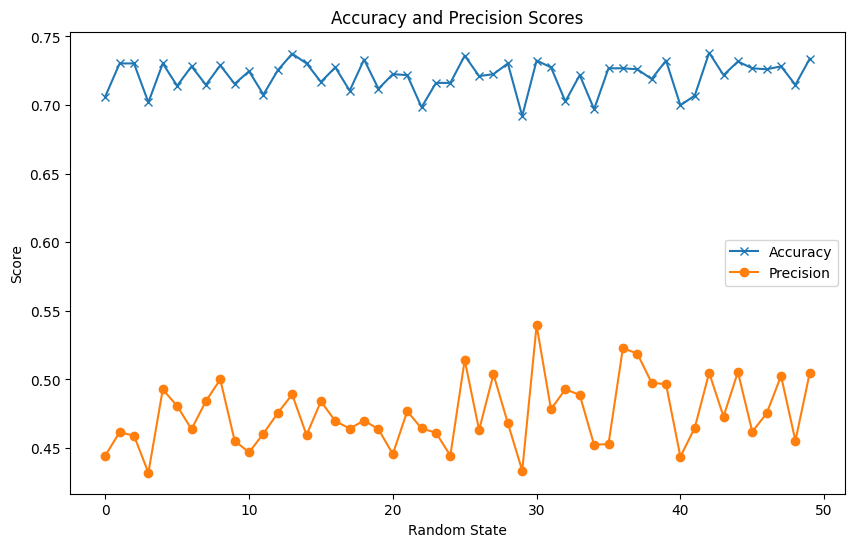

In [16]:
n = 50 
random_state = []
ada_accuracy = []
ada_precision = []
for i in range(n): 
    random_state.append(i)
    #splitting test and training data 
    #Splitting the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = i)
  

    #One hot encode X_train and X_test categorical columns 
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays into DataFrames with matching indices
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Drop original categorical columns and merge encoded columns
    X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

    
    #Data Resampling as the original data set is imbalanced 
    smote = SMOTE(random_state = i)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    #Scaling data
    scaler = StandardScaler()
    X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    #Model fitting
    xtc = ExtraTreeClassifier(random_state=i)
    xtc.fit(X_train_resampled, y_train_resampled)
    y_pred = xtc.predict(X_test)
    ada_accuracy.append(accuracy_score(y_test, y_pred))
    ada_precision.append(precision_score(y_test, y_pred))
    print(f"Random state: {i}, Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred)}")
    print("-" * 27)
    print(f"The mean accuracy is: {np.mean(ada_accuracy)}")
    print(f"The mean precision is: {np.mean(ada_precision)}")


    #Plotting the accuracy and precision scores

plt.figure(figsize=(10, 6))
plt.plot(random_state, ada_accuracy, label = 'Accuracy', marker = 'x')
plt.plot(random_state, ada_precision, label = 'Precision', marker = 'o')
plt.xlabel('Random State')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores')
plt.legend()
plt.show()


Random state: 0, Accuracy: 0.7842441447835344, Precision: 0.5860215053763441
---------------------------
The mean accuracy is: 0.7842441447835344
The mean precision is: 0.5860215053763441
Random state: 1, Accuracy: 0.7892122072391767, Precision: 0.5652173913043478
---------------------------
The mean accuracy is: 0.7867281760113556
The mean precision is: 0.575619448340346
Random state: 2, Accuracy: 0.8034066713981547, Precision: 0.6
---------------------------
The mean accuracy is: 0.7922876744736219
The mean precision is: 0.5837462988935639
Random state: 3, Accuracy: 0.8062455642299503, Precision: 0.625
---------------------------
The mean accuracy is: 0.7957771469127041
The mean precision is: 0.5940597241701729
Random state: 4, Accuracy: 0.7672107877927609, Precision: 0.5605263157894737
---------------------------
The mean accuracy is: 0.7900638750887155
The mean precision is: 0.5873530424940331
Random state: 5, Accuracy: 0.7963094393186657, Precision: 0.6292428198433421
------------

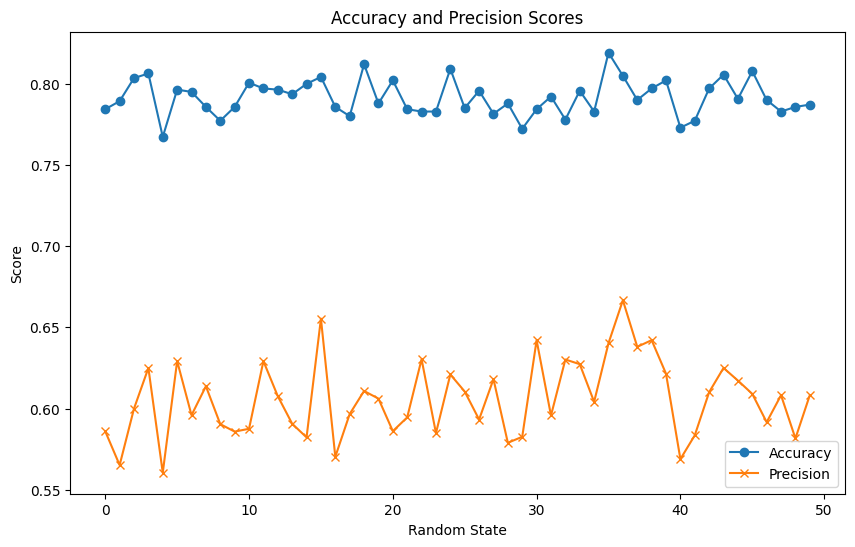

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

n = 50 
random_state = []
gbc_accuracy = []
gbc_precision = []
for i in range(n):
    random_state.append(i)
    #splitting test and training data 
    #Splitting the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = i)
  

    #One hot encode X_train and X_test categorical columns 
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays into DataFrames with matching indices
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Drop original categorical columns and merge encoded columns
    X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

    
    #Data Resampling as the original data set is imbalanced 
    smote = SMOTE(random_state = i)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    #Scaling data
    scaler = StandardScaler()
    X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    #model fitting
    gbc = GradientBoostingClassifier(random_state=i)
    gbc.fit(X_train_resampled, y_train_resampled)
    y_pred = gbc.predict(X_test)
    gbc_accuracy.append(accuracy_score(y_test, y_pred))
    gbc_precision.append(precision_score(y_test, y_pred))
    print(f"Random state: {i}, Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred)}")
    print("-" * 27)
    print(f"The mean accuracy is: {np.mean(gbc_accuracy)}")
    print(f"The mean precision is: {np.mean(gbc_precision)}")

plt.figure(figsize=(10, 6))
plt.plot(random_state, gbc_accuracy, label = 'Accuracy', marker = 'o')
plt.plot(random_state, gbc_precision, label = 'Precision', marker = 'x')
plt.xlabel('Random State')
plt.ylabel('Score')
plt.title('Accuracy and Precision Scores')
plt.legend()
plt.show()

In [18]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

n = 50 
random_state = []
stack_accuracy = []
stack_precision = []
for i in range(n):
    random_state.append(i)

    #splitting test and training data 
    #Splitting the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = i)
  

    #One hot encode X_train and X_test categorical columns 
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays into DataFrames with matching indices
    X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
    X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Drop original categorical columns and merge encoded columns
    X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
    X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

    
    #Data Resampling as the original data set is imbalanced 
    smote = SMOTE(random_state = i)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    #Scaling data
    scaler = StandardScaler()
    X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    #model fitting
    base_estimators = [
        ('rf', RandomForestClassifier(random_state=i)),
        ('xgb', XGBClassifier(random_state=i))
    ]
    stack = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression(random_state=i))
    stack.fit(X_train_resampled, y_train_resampled)
    y_pred = stack.predict(X_test)
    stack_accuracy.append(accuracy_score(y_test, y_pred))
    stack_precision.append(precision_score(y_test, y_pred))
    print(f"Random state: {i}, Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred)}")
    print("-" * 27)
    print(f"The mean accuracy is: {np.mean(stack_accuracy)}")
    print(f"The mean precision is: {np.mean(stack_precision)}")

Random state: 0, Accuracy: 0.7735982966643009, Precision: 0.5690140845070423
---------------------------
The mean accuracy is: 0.7735982966643009
The mean precision is: 0.5690140845070423
Random state: 1, Accuracy: 0.7892122072391767, Precision: 0.5683646112600537
---------------------------
The mean accuracy is: 0.7814052519517388
The mean precision is: 0.568689347883548
Random state: 2, Accuracy: 0.794889992902768, Precision: 0.5913312693498453
---------------------------
The mean accuracy is: 0.7859001656020818
The mean precision is: 0.5762366550389805
Random state: 3, Accuracy: 0.7927608232789212, Precision: 0.6072507552870091
---------------------------
The mean accuracy is: 0.7876153300212916
The mean precision is: 0.5839901801009876
Random state: 4, Accuracy: 0.7757274662881476, Precision: 0.580110497237569
---------------------------
The mean accuracy is: 0.7852377572746627
The mean precision is: 0.5832142435283039
Random state: 5, Accuracy: 0.7835344215755855, Precision: 0.616

In [20]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
    params = {
        "n_estimators" : trial.suggest_int('n_estimators', 200, 1000),
        'learning_rate' : trial.suggest_float('learning_rate', 0.001, 0.5),
        'loss' : trial.suggest_categorical('loss', ['log_loss', 'exponential']),
        'criterion' : trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error']),
        "max_features" : trial.suggest_categorical('max_features', ['sqrt', 'log2']),
       "max_depth" : trial.suggest_int('max_depth', 20, 80),
        "min_samples_split" : trial.suggest_int('min_samples_split', 2, 11),
        "min_samples_leaf" : trial.suggest_int('min_samples_leaf', 1, 5)
    }
    
    gbc = GradientBoostingClassifier(**params)
    score = cross_val_score(gbc, X_train_resampled, y_train_resampled, n_jobs = -1, cv = 5, scoring = 'accuracy').mean()
    return score
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100, n_jobs=-1)
print("Best parameters", study.best_params)
print("Best score", study.best_value)

[I 2025-03-23 11:13:47,840] A new study created in memory with name: no-name-a85ac708-5acc-48d2-ba09-d3b487d4d2d5
[I 2025-03-23 11:14:13,044] Trial 0 finished with value: 0.8301366502311719 and parameters: {'n_estimators': 274, 'learning_rate': 0.2417448445631118, 'loss': 'log_loss', 'criterion': 'squared_error', 'max_features': 'log2', 'max_depth': 61, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8301366502311719.
[I 2025-03-23 11:14:21,019] Trial 1 finished with value: 0.8308602682045612 and parameters: {'n_estimators': 637, 'learning_rate': 0.317317346601834, 'loss': 'exponential', 'criterion': 'friedman_mse', 'max_features': 'log2', 'max_depth': 27, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.8308602682045612.
[I 2025-03-23 11:14:54,926] Trial 2 finished with value: 0.8344797412446956 and parameters: {'n_estimators': 984, 'learning_rate': 0.47836023214270756, 'loss': 'exponential', 'criterion': 'squared_error', 'ma

Best parameters {'n_estimators': 467, 'learning_rate': 0.0031980308979549787, 'loss': 'log_loss', 'criterion': 'friedman_mse', 'max_features': 'sqrt', 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 4}
Best score 0.8428038958892821


In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1),
        'max_depth': trial.suggest_int('max_depth', 20, 100), 
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']), 
    }
    
    # Define base estimator with max_depth
    estimator = ExtraTreeClassifier(max_depth=params['max_depth'],
                                      criterion=params['criterion'],
                             max_features=params['max_features'], 
                            )

    # AdaBoost Classifier
    abc = AdaBoostClassifier(estimator=estimator,   Fixed parameter name
                             n_estimators=params['n_estimators'], 
                             learning_rate=params['learning_rate'])

    # Cross-validation score
    score = cross_val_score(abc, X_train_resampled, y_train_resampled,n_jobs = -1, cv=5, scoring='accuracy').mean()
    return score
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100, n_jobs = -1)
print("Best parameters", study.best_params)
print("Best score", study.best_value)


[I 2025-03-23 06:10:09,230] A new study created in memory with name: no-name-4851ed6f-9099-430a-b6ae-0bf6cf02f0d4
[I 2025-03-23 06:10:34,613] Trial 1 finished with value: 0.8324252194695457 and parameters: {'n_estimators': 1002, 'learning_rate': 0.319365855877656, 'max_depth': 29, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 1 with value: 0.8324252194695457.
[I 2025-03-23 06:10:56,082] Trial 3 finished with value: 0.8232549268264984 and parameters: {'n_estimators': 580, 'learning_rate': 0.8749289219652141, 'max_depth': 44, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 1 with value: 0.8324252194695457.
[I 2025-03-23 06:11:21,594] Trial 2 finished with value: 0.8345954910010024 and parameters: {'n_estimators': 1835, 'learning_rate': 0.8690618282055864, 'max_depth': 25, 'criterion': 'gini', 'max_features': 'log2'}. Best is trial 2 with value: 0.8345954910010024.
[I 2025-03-23 06:11:30,472] Trial 0 finished with value: 0.8319428560196789 and parameters: {

Best parameters {'n_estimators': 1862, 'learning_rate': 0.07903499637507629, 'max_depth': 22, 'criterion': 'entropy', 'max_features': 'log2'}
Best score 0.8379750198922145


In [26]:
import optuna
from sklearn.model_selection import cross_val_score
def objective(trial):
   params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 10, 50),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"])
    }
    
   model = RandomForestClassifier(**params)
   score = cross_val_score(model, X_train_resampled, y_train_resampled, n_jobs = -1, cv = 5, scoring = 'accuracy').mean()
   return score
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100, n_jobs=-1)
print("Best parameters", study.best_params)
print("Best score", study.best_value)


[I 2025-03-23 12:15:04,164] A new study created in memory with name: no-name-494b903d-68f7-40a5-94be-181a8cea51f0
[I 2025-03-23 12:15:46,739] Trial 0 finished with value: 0.8414735744762323 and parameters: {'n_estimators': 705, 'max_depth': 43, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8414735744762323.
[I 2025-03-23 12:15:47,108] Trial 4 finished with value: 0.843769059580549 and parameters: {'n_estimators': 651, 'max_depth': 33, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 4 with value: 0.843769059580549.
[I 2025-03-23 12:15:48,859] Trial 6 finished with value: 0.8453358308102554 and parameters: {'n_estimators': 262, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}. Best is trial 6 with value: 0.8453358308102554.
[I 20

Best parameters {'n_estimators': 109, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy'}
Best score 0.8479892665760568


In [ ]:
import joblib

joblib.dump